# Linear Regression - A Neural Network Approach
From scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plot Settings

# matplotlib
plt.rcParams['figure.figsize'] = 9,6
plt.rcParams.update({'font.size': 16})

# seaborn
sns.set_style('whitegrid')
color_palette = sns.color_palette("husl", 8)
sns.set_palette(color_palette)

# For "Animation"
from time import sleep
from IPython.display import clear_output

### Data
Suppose you own a food truck business and you want to open up a new truck at a new city. Given your recent profit data for different cities, and as well as their respective population, your goal is to predict your profit for a new city, given only its population.

In [2]:
data_dir = 'Data/ex1data1.txt'
data = np.loadtxt(data_dir, delimiter=',')

In [3]:
def plot(x, y, xlabel = 'City Population (in 10,000s)', ylabel = 'Profit in $10,000s', s=100, y_predicted = []):
    """Creates a scatter plot of y vs x.
    """
    # Initialize figure
    fig, ax = plt.subplots()
        
    sns.scatterplot(x, y, s=s, ax=ax, label = 'Training Data')
    if  len(y_predicted) != 0:
        sns.lineplot(x, y_predicted, label = 'Linear Regression', ax=ax, color=color_palette[3], lw=3)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend(loc='best')
    plt.show()

Let's try to visualize the data through a scatter plot

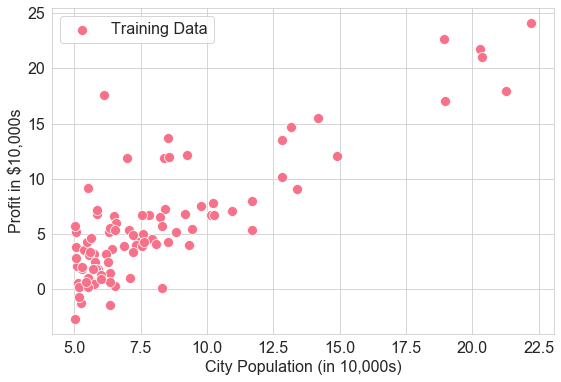

In [4]:
plot(data[:,0], data[:,1])

## Gradient Descent
For linear regression, the goal is to minimize the cost function
$$
J(\theta_0, \theta_1)  = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{i})- y^{(i)}\right)^2,
$$
where the the hypothesis $h$ is given to be
$$
h_\theta(x) = \theta_0 + \theta_1 x.
$$
Note that the parameters $\theta_0$ and $\theta_1$ will be the ones to be adjusted in order to minimize the cost function $J$. In order to do so, we perform batch gradient descent through many iterations
$$
\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)
$$
$$
\theta_j := \theta_j- \frac{\alpha}{m} \sum_{i=1}^{m} \left[ \left( h_\theta(x^{i})- y^{(i)}\right) x_i \right]
$$
where $\alpha$ is the learning rate.

#### Implementation
First, we add a column of ones to account for the intercept term

In [5]:
X = np.vstack([np.ones(len(data[:,0])), data[:,0]]).T
y = data[:,1]

#### Initialization
We set the initial parameters to start the gradient descent

In [6]:
np.random.seed(42) # Set seed for reproducibility
theta = np.random.random(2).T # Random initial parameters
iterations = 1500
alpha = 0.01

#### Cost Computation
One helpful way to monitor the convergence of the gradient descent is through the computation of the cost

In [7]:
def J(X, y, theta):
    """Computes the cost function given the observations X, output y, and
    the parameters theta
    
    Recall:
    J = (1/(2m)) \sum_{i=1}^m ((theta_0 + theta_1*x^i) - y^i)**2 
    
    Returns:
    --------
    J - float, the value of the cost function at X, y, and theta
    """
    # Calculate number of training samples
    m = len(y)
    
    # Compute the hypothesis, h
    h_theta = X@theta # Result is an m by 1 vector
    
    # Calculate cost
    J = (1/(2*m)) * np.sum((h_theta-y)**2)
    
    return J

#### Gradient Descent Implementation

In [8]:
def plot_cost(iter_, cost):
    """Plots the value of the cost function through iterations.
    We can be confident that our gradient descent is actually converging to the global
    minimum if the cost will never increase
    """
    sns.lineplot(x=iter_, y=cost)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
    
def gradient_descent(X, y, theta, alpha, iter_, animate = False):
    """Performs batch gradient descent to update the parameters in theta so that it will
    minimize the sum of squared errors.
    
    Recall: Gradient Descent 
    --------
    theta := theta - alpha/m * X.T @ (X@theta -y)
    
    Returns:
    theta_out - the updated parameters
    """
    theta_out = np.copy(theta)
    
    # Obtain the number of samples
    m = len(y)
    
    # Create holding list for the cost
    iter_holder = []
    J_hist = []
    
    # iterate over the desired number of iterations
    for i in range(iter_):
        # For the plot later
        iter_holder.append(i)
        
        # Update parameters
        theta_out -= alpha/m * X.T @ (X@theta_out - y)
        
        # Append cost
        J_hist.append(J(X,y,theta_out))
        
        # Run for the lulz, but execution is super slow xD
        if animate:
            # Plot the cost
            plot_cost(iter_holder, J_hist)
            plt.show()
            sleep(0.1)
            clear_output(wait=True)
    
    if ~animate:
        plot_cost(iter_holder, J_hist)
    return theta_out

Run gradient descent

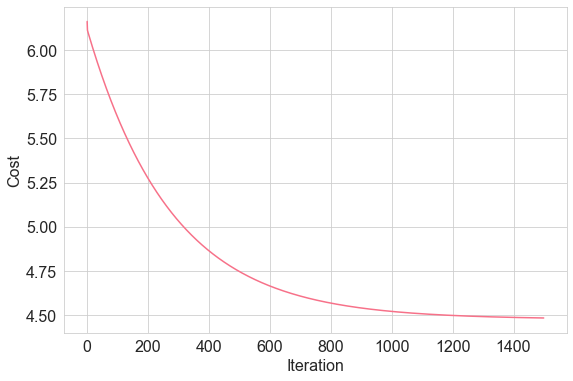

In [9]:
theta_best = gradient_descent(X, y, theta, alpha=alpha, iter_ = iterations)

We see that the gradient descent is indeed converging to the global minimum. Let us see the best fit line using the best parameters <i>theta_best</i>.

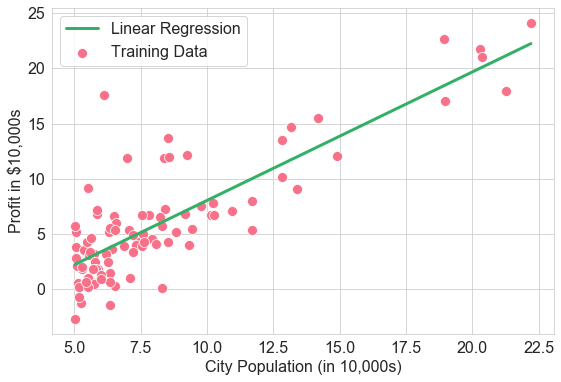

In [10]:
y_pred = X @ theta_best
plot(X[:,1], y, y_predicted = y_pred)